# Linear Regression of Yearly School Population and Classroom Usage
Demographic Trends and Facility Planning uses the 85% school capacity measurement to determine if a school is in danger of overcrowding. This model presumes there is a relationship between the number of students at a school and the number of classrooms in use at the school.

Is there a statistically relevant relationship between the number of students at a school and the number of classrooms in use for any year? The answer seems obvious, but can we prove it? If there is a relationship, can we quantify it?

## Analysis
Using an [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) [linear regression](https://en.wikipedia.org/wiki/Linear_regression) model of the yearly number of students at a school vs the number of classrooms in use, we can determine if there is a relationship between the two variables and how strong that relationship is.

### Data
This analysis uses the third Friday enrollment counts from 1998 through 2019.

In [1]:
from data.enrollment_info import get_capacity_and_classrooms_in_use_by_school_and_year

df = get_capacity_and_classrooms_in_use_by_school_and_year(1998, 2019)

print(df)

     Year          School  Classrooms  Students
0    1998           Davey        19.0     432.0
1    1998       Lakeshore        15.0     245.0
2    1998     Locust Lane        16.0     334.0
3    1998      Longfellow        20.0     387.0
4    1998            Manz        20.0     457.0
..    ...             ...         ...       ...
255  2019      Northwoods        17.0     353.0
256  2019  Putnam Heights        18.0     432.0
257  2019         Robbins        23.0     498.0
258  2019       Roosevelt        12.0     276.0
259  2019         Sherman        22.0     485.0

[260 rows x 4 columns]


### Graph
The `seaborn.lmplot()` creates a scatter plot of the yearly *(students, classrooms)* data points, as well as a regression model and confidence interval. We can use this graph to visualize the relationship between the two variables.

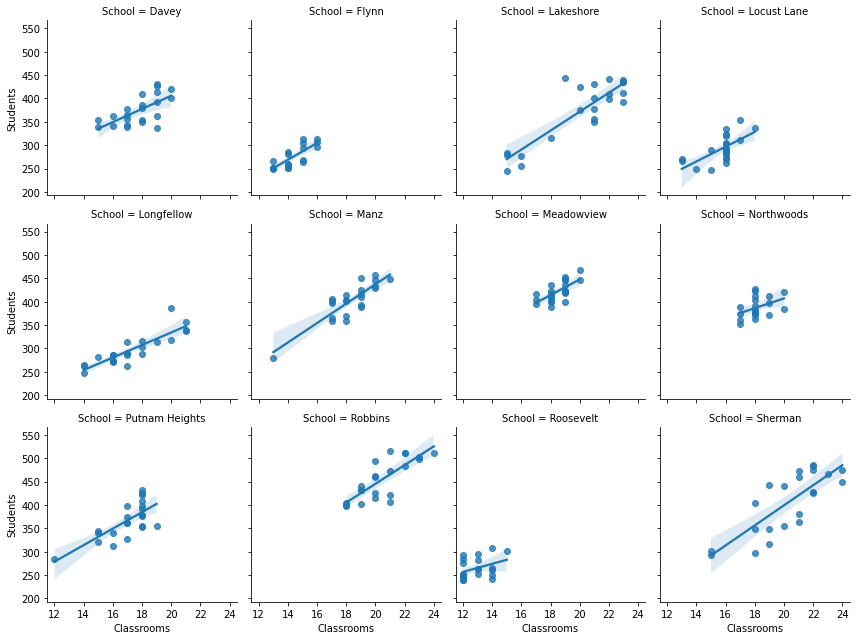

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.lmplot(x="Classrooms", y="Students", col="School", col_wrap=4, data=df, height=3)
g.set(xlim=(11.5, 24.5))
g.set(xticks=range(12, 25, 2))
plt.show()

There are numerous cases where the data points don't follow the models expectations. This is to be expected -- children are not evenly spread across every grade at every school. We can also see that there are some unusual results at some schools -- Davey, Meadowview, Northwoods, and Roosevelt -- where the model doesn't fit the data points very well.

### Linear Regression
To determine if there is a relationship between the two variables, and if there is one, quantify it, we will run the data points through an [linear regression](https://en.wikipedia.org/wiki/Linear_regression).

The linear regression will provide us with a significant amount of information, but we will focus on two of the results: the `p-value` (`P>|t| for Students`) and the `r-squared` value.

The `p-value` indicates if there is a statistically significant relationship between the variables. Values greater than 0.05 indicate it is unlikely the variables are related.

~The `r-squared` value measures how well the observed outcomes are reproduced by the model. The less variation the observed outcomes have from the model, the higher the `r-squared `value becomes.~

#### OLS Regression Summaries
##### Sam Davey

In [3]:
from IPython.display import display, Markdown, Latex
import statsmodels.formula.api as smf

lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Davey"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     14.72
Date:                Tue, 25 Aug 2020   Prob (F-statistic):            0.00103
Time:                        20:17:27   Log-Likelihood:                -32.741
No. Observations:                  22   AIC:                             69.48
Df Residuals:                      20   BIC:                             71.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.4962      2.949      2.203      0.0

The linear regression indicates there is a relationship between the variables, though the `r-squared` value is only 0.424. There is room for improvement in this model.

##### Flynn

In [4]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Flynn"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     26.26
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           0.000102
Time:                        20:17:27   Log-Likelihood:                -16.937
No. Observations:                  18   AIC:                             37.87
Df Residuals:                      16   BIC:                             39.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8158      1.875      2.569      0.0

/home/jhendric/.local/share/virtualenvs/ecasd-enrollment-otYJYCmf/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The `r-squared` value at Flynn is a bit better, 0.621.

##### Lakeshore

In [5]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Lakeshore"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     64.58
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.09e-07
Time:                        20:17:27   Log-Likelihood:                -38.103
No. Observations:                  22   AIC:                             80.21
Df Residuals:                      20   BIC:                             82.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9799      1.771      3.376      0.0

Another good `r-squared` value of 0.764.

##### Locust Lane

In [6]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Locust Lane"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     14.67
Date:                Tue, 25 Aug 2020   Prob (F-statistic):            0.00105
Time:                        20:17:27   Log-Likelihood:                -27.961
No. Observations:                  22   AIC:                             59.92
Df Residuals:                      20   BIC:                             62.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.8959      2.054      3.844      0.0

Locust Lane's `r-squared` value is 0.423, and has room for improvement.

##### Longfellow

In [7]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Longfellow"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     64.05
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.16e-07
Time:                        20:17:27   Log-Likelihood:                -32.800
No. Observations:                  22   AIC:                             69.60
Df Residuals:                      20   BIC:                             71.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3294      2.136      0.154      0.8

Longfellow has the highest `r-squared` value in the district, at 0.762.

##### Manz

In [8]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Manz"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     59.96
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.92e-07
Time:                        20:17:27   Log-Likelihood:                -26.781
No. Observations:                  22   AIC:                             57.56
Df Residuals:                      20   BIC:                             59.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7717      1.887      1.998      0.0

Another strong `r-squared` value of 0.750.

##### Meadowview

In [9]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Meadowview"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     17.99
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           0.000400
Time:                        20:17:27   Log-Likelihood:                -20.275
No. Observations:                  22   AIC:                             44.55
Df Residuals:                      20   BIC:                             46.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5272      2.815      2.318      0.0

Meadowviews `r-squared` value is lower than most of the other schools, at 0.474.

##### Northwoods

In [10]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Northwoods"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     4.074
Date:                Tue, 25 Aug 2020   Prob (F-statistic):             0.0572
Time:                        20:17:27   Log-Likelihood:                -24.660
No. Observations:                  22   AIC:                             53.32
Df Residuals:                      20   BIC:                             55.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8363      3.126      3.787      0.0

The `p-value` at Northwoods is 0.057, which is greater than 0.05. This tells us that the data does not indicate a relationship between the variables. In this case, we ignore the `r-squared` value, as it is irrelevant.

There are clearly other factors that are influencing the number of classrooms in use at Northwoods. Some time should be spent understanding what those factors are, and a new model should be developed that reflects them.

##### Putnam Heights

In [11]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Putnam Heights"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     22.26
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           0.000132
Time:                        20:17:27   Log-Likelihood:                -32.650
No. Observations:                  22   AIC:                             69.30
Df Residuals:                      20   BIC:                             71.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0200      2.330      2.584      0.0

Putnam Heights `r-squared` value is 0.527.

##### Robbins

In [12]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Robbins"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     33.38
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           1.18e-05
Time:                        20:17:27   Log-Likelihood:                -31.718
No. Observations:                  22   AIC:                             67.44
Df Residuals:                      20   BIC:                             69.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2634      2.467      2.539      0.0

Robbins `r-squared` value is 0.625.

##### Roosevelt

In [13]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Roosevelt"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3.498
Date:                Tue, 25 Aug 2020   Prob (F-statistic):             0.0762
Time:                        20:17:27   Log-Likelihood:                -27.988
No. Observations:                  22   AIC:                             59.98
Df Residuals:                      20   BIC:                             62.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2978      2.425      3.422      0.0

The `p-value` for Roosevelt is 0.076, which is greater than 0.05. Like Northwoods, this means the current data does not indicate a relationship between the two variables and a different model needs to be developed for this school.

##### Sherman

In [14]:
lm = smf.ols(formula="Classrooms ~ Students", data=df[df["School"] == "Sherman"]).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Classrooms   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     34.70
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           9.21e-06
Time:                        20:17:27   Log-Likelihood:                -39.551
No. Observations:                  22   AIC:                             83.10
Df Residuals:                      20   BIC:                             85.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2952      2.059      4.028      0.0

Sherman has an `r-squared` value of 0.634.

## Summary
For most of the schools in ECASD, we have proven there is a reasonably strong relationship between the number of students at a school and the number of classrooms used for instruction.

There are a few schools with `r-squared` values that could be improved upon with better models -- Davey (0.424), Locust Lane (0.423), and Meadowview (0.474).

Lastly, a new model should be created for Northwoods and Roosevelt.